In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\Australia Car Market Data\old_cars_info.csv")

In [3]:
df.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [4]:
df.drop(['ID', 'Name', 'Variant', 'Series'], axis=1, inplace=True)

In [5]:
df.head()

,Price,Brand,Model,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Mercedes-Benz,V,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Mercedes-Benz,Valente,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Mercedes-Benz,E250,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Cruze,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             17048 non-null  int64 
 1   Brand             17048 non-null  object
 2   Model             17048 non-null  object
 3   Year              17048 non-null  int64 
 4   Kilometers        17048 non-null  int64 
 5   Type              17048 non-null  object
 6   Gearbox           17048 non-null  object
 7   Fuel              17048 non-null  object
 8   Status            17048 non-null  object
 9   CC                17048 non-null  int64 
 10  Color             17048 non-null  object
 11  Seating Capacity  17048 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 1.6+ MB


In [7]:
df.duplicated().sum()

65

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,Price,Brand,Model,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Mercedes-Benz,V,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Mercedes-Benz,Valente,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Mercedes-Benz,E250,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,Cruze,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [10]:
df["Brand"].unique().shape

(59,)

In [11]:
df["Brand"].value_counts().head(8)

Brand
Toyota        2750
Holden        1500
Ford          1490
Mazda         1164
Hyundai       1087
Mitsubishi    1072
Volkswagen    1012
Nissan        1005
Name: count, dtype: int64

In [12]:
df["Brand"].value_counts().head(8).index.to_list()

['Toyota',
 'Holden',
 'Ford',
 'Mazda',
 'Hyundai',
 'Mitsubishi',
 'Volkswagen',
 'Nissan']

In [13]:
df["Brand"] = df["Brand"].apply(lambda x: x if x in df["Brand"].value_counts().head(8).index.to_list() else "Other")

In [14]:
df["Brand"].value_counts()

Brand
Other         5903
Toyota        2750
Holden        1500
Ford          1490
Mazda         1164
Hyundai       1087
Mitsubishi    1072
Volkswagen    1012
Nissan        1005
Name: count, dtype: int64

In [15]:
df["Model"].value_counts().head(10)

Model
Ranger       648
Hilux        537
Commodore    490
Triton       368
Corolla      355
Navara       305
RAV4         304
Colorado     281
3            281
X-Trail      275
Name: count, dtype: int64

In [16]:
df["Model"] = df["Model"].apply(lambda x: x if x in df["Model"].value_counts().head(9).index.to_list() else "Other")

In [17]:
df["Model"].value_counts()

Model
Other        13414
Ranger         648
Hilux          537
Commodore      490
Triton         368
Corolla        355
Navara         305
RAV4           304
Colorado       281
3              281
Name: count, dtype: int64

In [18]:
df.drop("Model", axis=1, inplace=True)

In [19]:
df.head()

,Price,Brand,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,117990,Other,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,79990,Other,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,34990,Other,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,15990,Holden,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [20]:
df["Year"].value_counts().shape

(34,)

In [21]:
df["Age"] = 2025 - df["Year"]

In [22]:
df.head()

,Price,Brand,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5,15
1,117990,Other,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7,4
2,79990,Other,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8,4
3,34990,Other,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4,15
4,15990,Holden,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5,9


In [23]:
pd.cut(df["Age"], bins=5).value_counts()

Age
(2.967, 9.6]    9910
(9.6, 16.2]     5490
(16.2, 22.8]    1353
(22.8, 29.4]     209
(29.4, 36.0]      21
Name: count, dtype: int64

In [24]:
df["Age"].value_counts().sort_index()

Age
3     1114
4     1004
5     1028
6     1621
7     1888
8     1812
9     1443
10    1206
11    1006
12     946
13     802
14     586
15     553
16     391
17     359
18     327
19     225
20     186
21     139
22     117
23      74
24      45
25      40
26      15
27      16
28      10
29       9
30       7
31       3
32       4
33       1
34       2
35       2
36       2
Name: count, dtype: int64

In [25]:
df["Age"] = pd.cut(df["Age"], bins=[3, 7, 11, 19, 36])

In [26]:
df.drop("Year", axis=1, inplace=True)

In [27]:
df.head()

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5,"(11, 19]"
1,117990,Other,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7,"(3, 7]"
2,79990,Other,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8,"(3, 7]"
3,34990,Other,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4,"(11, 19]"
4,15990,Holden,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5,"(7, 11]"


In [28]:
np.round(df["Kilometers"].describe(), 2)

count      16983.00
mean      103441.81
std        80385.96
min            1.00
25%        44785.50
50%        88814.00
75%       149033.00
max      2700000.00
Name: Kilometers, dtype: float64

<Axes: >

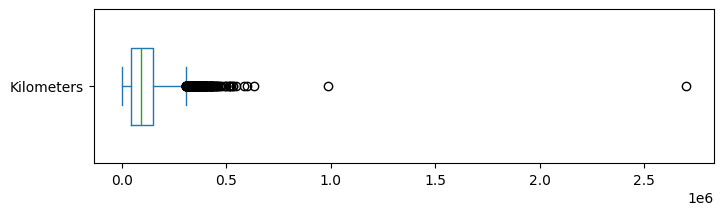

In [29]:
df['Kilometers'].plot.box(vert=False, figsize=(8, 2), widths=0.5)

In [30]:
df.query("Kilometers > 500000")

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
754,15000,Toyota,523812,Wagon,Automatic,Unleaded Petrol,Used,4477,Darkblue,8,"(19, 36]"
1083,15000,Toyota,512000,Wagon,Automatic,Unleaded Petrol,Used,4477,Dark,8,"(19, 36]"
1408,28990,Toyota,530137,Hardtop,Manual,Diesel,Used,4164,Grey,6,"(19, 36]"
3851,15999,Toyota,634470,Van,Manual,Diesel,Used,2982,White,3,"(11, 19]"
3958,9990,Toyota,544000,Van,Automatic,Diesel,Used,2494,White,3,"(19, 36]"
5379,29990,Toyota,531259,Wagon,Manual,Diesel,Used,4164,White,8,"(19, 36]"
5870,13000,Toyota,583000,Sedan,Automatic,Unleaded Petrol/Electric,Used,2494,White,5,"(7, 11]"
5919,5000,Toyota,987475,Hatchback,Manual,Unleaded Petrol,Used,1794,Black,5,"(19, 36]"
6527,18000,Toyota,515000,Van,Manual,Unleaded Petrol,Used,2694,White,3,"(11, 19]"
10291,1600,Ford,598000,Sedan,Automatic,Liquid Petroleum Gas,Used,3984,White,5,"(11, 19]"


<Axes: >

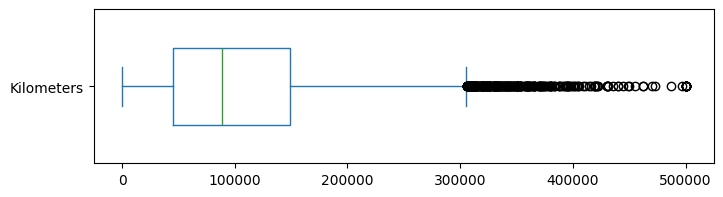

In [31]:
df["Kilometers"].apply(lambda x: x if x <= 500000 else 500000).plot.box(vert=False, figsize=(8, 2), widths=0.5)

In [32]:
df["Kilometers"] = df["Kilometers"].apply(lambda x: x if x <= 500000 else 500000)

In [33]:
np.round(df["Kilometers"].describe(), 2)

count     16983.00
mean     103255.01
std       77539.52
min           1.00
25%       44785.50
50%       88814.00
75%      149033.00
max      500000.00
Name: Kilometers, dtype: float64

In [34]:
df

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5,"(11, 19]"
1,117990,Other,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7,"(3, 7]"
2,79990,Other,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8,"(3, 7]"
3,34990,Other,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4,"(11, 19]"
4,15990,Holden,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5,"(7, 11]"
...,...,...,...,...,...,...,...,...,...,...,...
17043,4499,Holden,230441,Sedan,Automatic,Unleaded Petrol,Used,3791,Gold,5,"(19, 36]"
17044,4999,Toyota,237113,Hatchback,Manual,Unleaded Petrol,Used,1299,Yellow,5,"(11, 19]"
17045,7999,Holden,238768,Wagon,Automatic,Diesel,Used,2999,Gold,7,"(19, 36]"
17046,14000,Hyundai,49800,Hatchback,Manual,Unleaded Petrol,Used,1797,Blue,5,"(7, 11]"


In [36]:
df["Type"].value_counts()

Type
Wagon                    7740
Hatchback                2412
Sedan                    2320
Dual Cab Utility          655
Coupe                     468
Cab Chassis               424
Double Cab Pick Up        422
Dual Cab Pick-up          421
Van                       383
Crew Cab Pickup           269
Crew Cab Utility          207
Double Cab Utility        206
Utility                   178
Sportswagon               143
Double Cab Chassis         95
Crew Cab Chassis           77
Dual Cab Chassis           71
Convertible                44
Sportback                  43
Liftback                   39
Fastback                   36
Hardtop                    36
Cabriolet                  35
Softtop                    35
Super Cab Utility          23
Bus                        21
Space Cab Chassis          21
Super Cab Chassis          19
X Cab Pickup               13
Roadster                   13
Saloon                     13
Freestyle Cab Chassis      11
Space Cab Utility          10
X Cab

In [37]:
df["Type"] = df["Type"].apply(lambda x: x if x in df["Type"].value_counts().head(3).index.to_list() else "Other")

In [38]:
df["Type"].value_counts()

Type
Wagon        7740
Other        4511
Hatchback    2412
Sedan        2320
Name: count, dtype: int64

In [40]:
df["Gearbox"].value_counts()

Gearbox
Automatic    14516
Manual        2443
AWD             13
Front            8
Rear             3
Name: count, dtype: int64

In [45]:
df = df.query("Gearbox in ('Automatic', 'Manual')")

In [46]:
df["Gearbox"].value_counts()

Gearbox
Automatic    14516
Manual        2443
Name: count, dtype: int64

In [47]:
df.head()

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5,"(11, 19]"
1,117990,Other,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7,"(3, 7]"
2,79990,Other,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8,"(3, 7]"
3,34990,Other,120579,Other,Automatic,Diesel,Used,2143,Black,4,"(11, 19]"
4,15990,Holden,72506,Other,Automatic,Unleaded Petrol,Used,1796,White,5,"(7, 11]"


In [48]:
df["Fuel"].value_counts()

Fuel
Unleaded Petrol              6986
Diesel                       6062
Premium Unleaded Petrol      3413
Unleaded Petrol/Electric      254
Premium Unleaded/Electric     186
Liquid Petroleum Gas           40
Diesel/Electric                18
Name: count, dtype: int64

In [53]:
df['Fuel'] = df['Fuel'].str.replace("Unleaded ", "").str.replace(" Unleaded", "")

In [54]:
df["Fuel"].value_counts()

Fuel
Petrol                  6986
Diesel                  6062
Premium Petrol          3413
Petrol/Electric          254
Premium/Electric         186
Liquid Petroleum Gas      40
Diesel/Electric           18
Name: count, dtype: int64

In [57]:
df["Status"] = df["Status"].str.replace(" In Stock", "")

In [58]:
df["Status"].value_counts()

Status
Used    16252
Demo      374
New       333
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

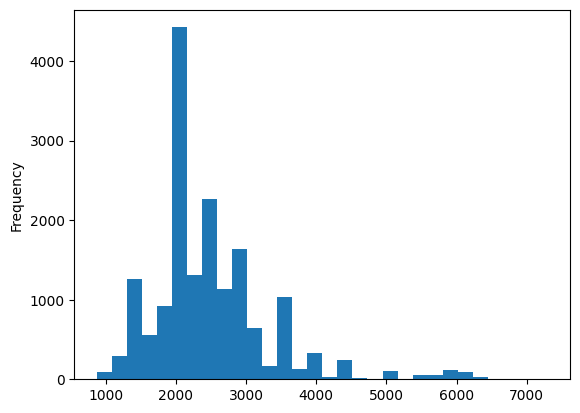

In [61]:
df['CC'].plot.hist(bins=30)

<Axes: >

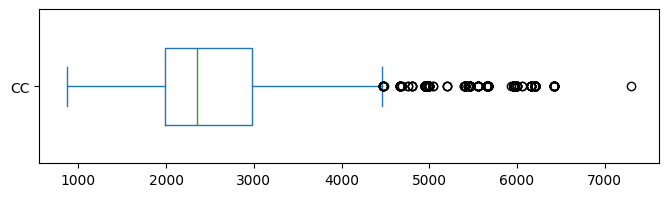

In [63]:
df["CC"].plot.box(vert=False, figsize=(8, 2), widths=0.5)

In [65]:
df["Color"].value_counts().head(10)

Color
White     6143
Silver    2448
Grey      2419
Black     1958
Blue      1567
Red       1157
Gold       167
Orange     155
Green      138
Brown      135
Name: count, dtype: int64

In [66]:
df["Color"] = df["Color"].apply(lambda x: x if x in df["Color"].value_counts().head(6).index.to_list() else "Other")

In [67]:
df["Color"].value_counts()

Color
White     6143
Silver    2448
Grey      2419
Black     1958
Blue      1567
Other     1267
Red       1157
Name: count, dtype: int64

In [68]:
df.head()

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,263000,Wagon,Automatic,Petrol,Used,2362,Grey,5,"(11, 19]"
1,117990,Other,19,Wagon,Automatic,Diesel,New,2143,Black,7,"(3, 7]"
2,79990,Other,24,Wagon,Automatic,Diesel,New,2143,Black,8,"(3, 7]"
3,34990,Other,120579,Other,Automatic,Diesel,Used,2143,Black,4,"(11, 19]"
4,15990,Holden,72506,Other,Automatic,Petrol,Used,1796,White,5,"(7, 11]"


In [69]:
df["Seating Capacity"].describe()

count    16959.000000
mean         5.116045
std          1.123614
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         14.000000
Name: Seating Capacity, dtype: float64

<Axes: >

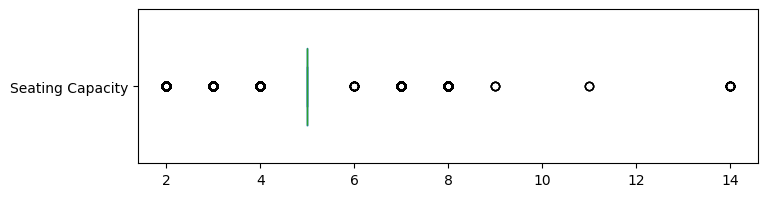

In [70]:
df["Seating Capacity"].plot.box(vert=False, figsize=(8, 2), widths=0.5)

In [71]:
df["Seating Capacity"].value_counts()

Seating Capacity
5     12751
7      2170
2       743
4       648
3       305
8       297
14       19
6        19
9         4
11        3
Name: count, dtype: int64

In [76]:
df["Seating Capacity"] = pd.cut(df["Seating Capacity"], bins=[2, 4, 5, 7, 14])

In [77]:
df["Seating Capacity"].value_counts()

Seating Capacity
(4, 5]     12751
(5, 7]      2189
(2, 4]       953
(7, 14]      323
Name: count, dtype: int64

In [78]:
df.head()

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,263000,Wagon,Automatic,Petrol,Used,2362,Grey,"(4, 5]","(11, 19]"
1,117990,Other,19,Wagon,Automatic,Diesel,New,2143,Black,"(5, 7]","(3, 7]"
2,79990,Other,24,Wagon,Automatic,Diesel,New,2143,Black,"(7, 14]","(3, 7]"
3,34990,Other,120579,Other,Automatic,Diesel,Used,2143,Black,"(2, 4]","(11, 19]"
4,15990,Holden,72506,Other,Automatic,Petrol,Used,1796,White,"(4, 5]","(7, 11]"


In [79]:
pwr_tr = PowerTransformer(method="yeo-johnson")

In [80]:
df[["Kilometers", "CC"]] = pwr_tr.fit_transform(df[["Kilometers", "CC"]])

<Axes: >

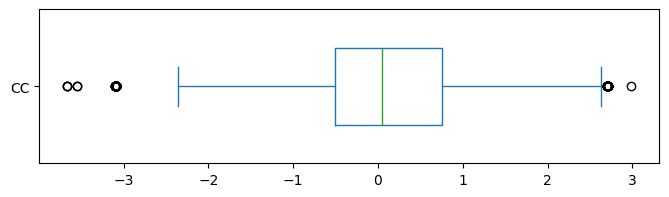

In [81]:
df["CC"].plot.box(vert=False, figsize=(8, 2), widths=0.5)

<Axes: >

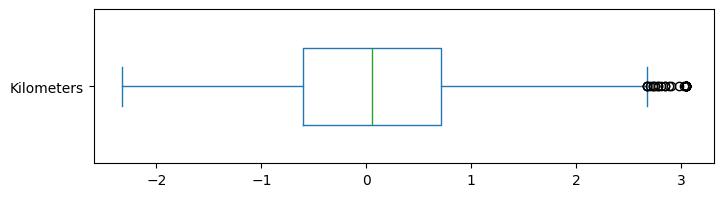

In [82]:
df["Kilometers"].plot.box(vert=False, figsize=(8, 2), widths=0.5)

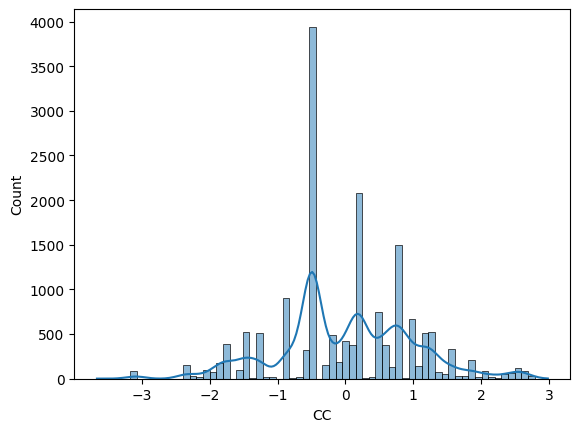

In [84]:
sns.histplot(df, x="CC", kde=True)
plt.show()

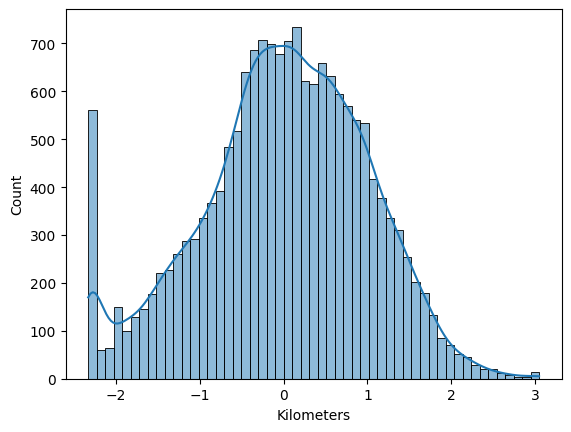

In [85]:
sns.histplot(df, x="Kilometers", kde=True)
plt.show()

In [86]:
df.head()

,Price,Brand,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity,Age
0,9999,Toyota,1.640582,Wagon,Automatic,Petrol,Used,0.055158,Grey,"(4, 5]","(11, 19]"
1,117990,Other,-2.296746,Wagon,Automatic,Diesel,New,-0.255328,Black,"(5, 7]","(3, 7]"
2,79990,Other,-2.291638,Wagon,Automatic,Diesel,New,-0.255328,Black,"(7, 14]","(3, 7]"
3,34990,Other,0.418290,Other,Automatic,Diesel,Used,-0.255328,Black,"(2, 4]","(11, 19]"
4,15990,Holden,-0.168776,Other,Automatic,Petrol,Used,-0.846436,White,"(4, 5]","(7, 11]"


In [115]:
df["Age"].value_counts()

Age
(3, 7]      5529
(7, 11]     5467
(11, 19]    4189
(19, 36]     672
Name: count, dtype: int64

In [92]:
cat_col = df.select_dtypes(["object", "category"]).columns.tolist()

In [93]:
ohe = OneHotEncoder(drop="first")

In [94]:
encoded = ohe.fit_transform(df[cat_col])

In [95]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 102380 stored elements and shape (16959, 34)>

In [96]:
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out())

In [97]:
encoded_df

,Brand_Holden,Brand_Hyundai,Brand_Mazda,Brand_Mitsubishi,Brand_Nissan,Brand_Other,Brand_Toyota,Brand_Volkswagen,Type_Other,Type_Sedan,...,Color_Silver,Color_White,"Seating Capacity_(4.0, 5.0]","Seating Capacity_(5.0, 7.0]","Seating Capacity_(7.0, 14.0]",Seating Capacity_nan,"Age_(7.0, 11.0]","Age_(11.0, 19.0]","Age_(19.0, 36.0]",Age_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16955,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16957,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16959 entries, 0 to 16958
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand_Holden                  16959 non-null  float64
 1   Brand_Hyundai                 16959 non-null  float64
 2   Brand_Mazda                   16959 non-null  float64
 3   Brand_Mitsubishi              16959 non-null  float64
 4   Brand_Nissan                  16959 non-null  float64
 5   Brand_Other                   16959 non-null  float64
 6   Brand_Toyota                  16959 non-null  float64
 7   Brand_Volkswagen              16959 non-null  float64
 8   Type_Other                    16959 non-null  float64
 9   Type_Sedan                    16959 non-null  float64
 10  Type_Wagon                    16959 non-null  float64
 11  Gearbox_Manual                16959 non-null  float64
 12  Fuel_Diesel/Electric          16959 non-null  float64
 13  F

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16959 entries, 0 to 17047
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             16959 non-null  int64   
 1   Brand             16959 non-null  object  
 2   Kilometers        16959 non-null  float64 
 3   Type              16959 non-null  object  
 4   Gearbox           16959 non-null  object  
 5   Fuel              16959 non-null  object  
 6   Status            16959 non-null  object  
 7   CC                16959 non-null  float64 
 8   Color             16959 non-null  object  
 9   Seating Capacity  16216 non-null  category
 10  Age               15857 non-null  category
dtypes: category(2), float64(2), int64(1), object(6)
memory usage: 1.8+ MB


In [102]:
df.reset_index(drop=True, inplace=True)

In [105]:
data = pd.concat([df, encoded_df], axis=1)

In [106]:
data.drop(cat_col, axis=1, inplace=True)

In [107]:
data.head()

,Price,Kilometers,CC,Brand_Holden,Brand_Hyundai,Brand_Mazda,Brand_Mitsubishi,Brand_Nissan,Brand_Other,Brand_Toyota,...,Color_Silver,Color_White,"Seating Capacity_(4.0, 5.0]","Seating Capacity_(5.0, 7.0]","Seating Capacity_(7.0, 14.0]",Seating Capacity_nan,"Age_(7.0, 11.0]","Age_(11.0, 19.0]","Age_(19.0, 36.0]",Age_nan
0,9999,1.640582,0.055158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,117990,-2.296746,-0.255328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79990,-2.291638,-0.255328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,34990,0.418290,-0.255328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,15990,-0.168776,-0.846436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

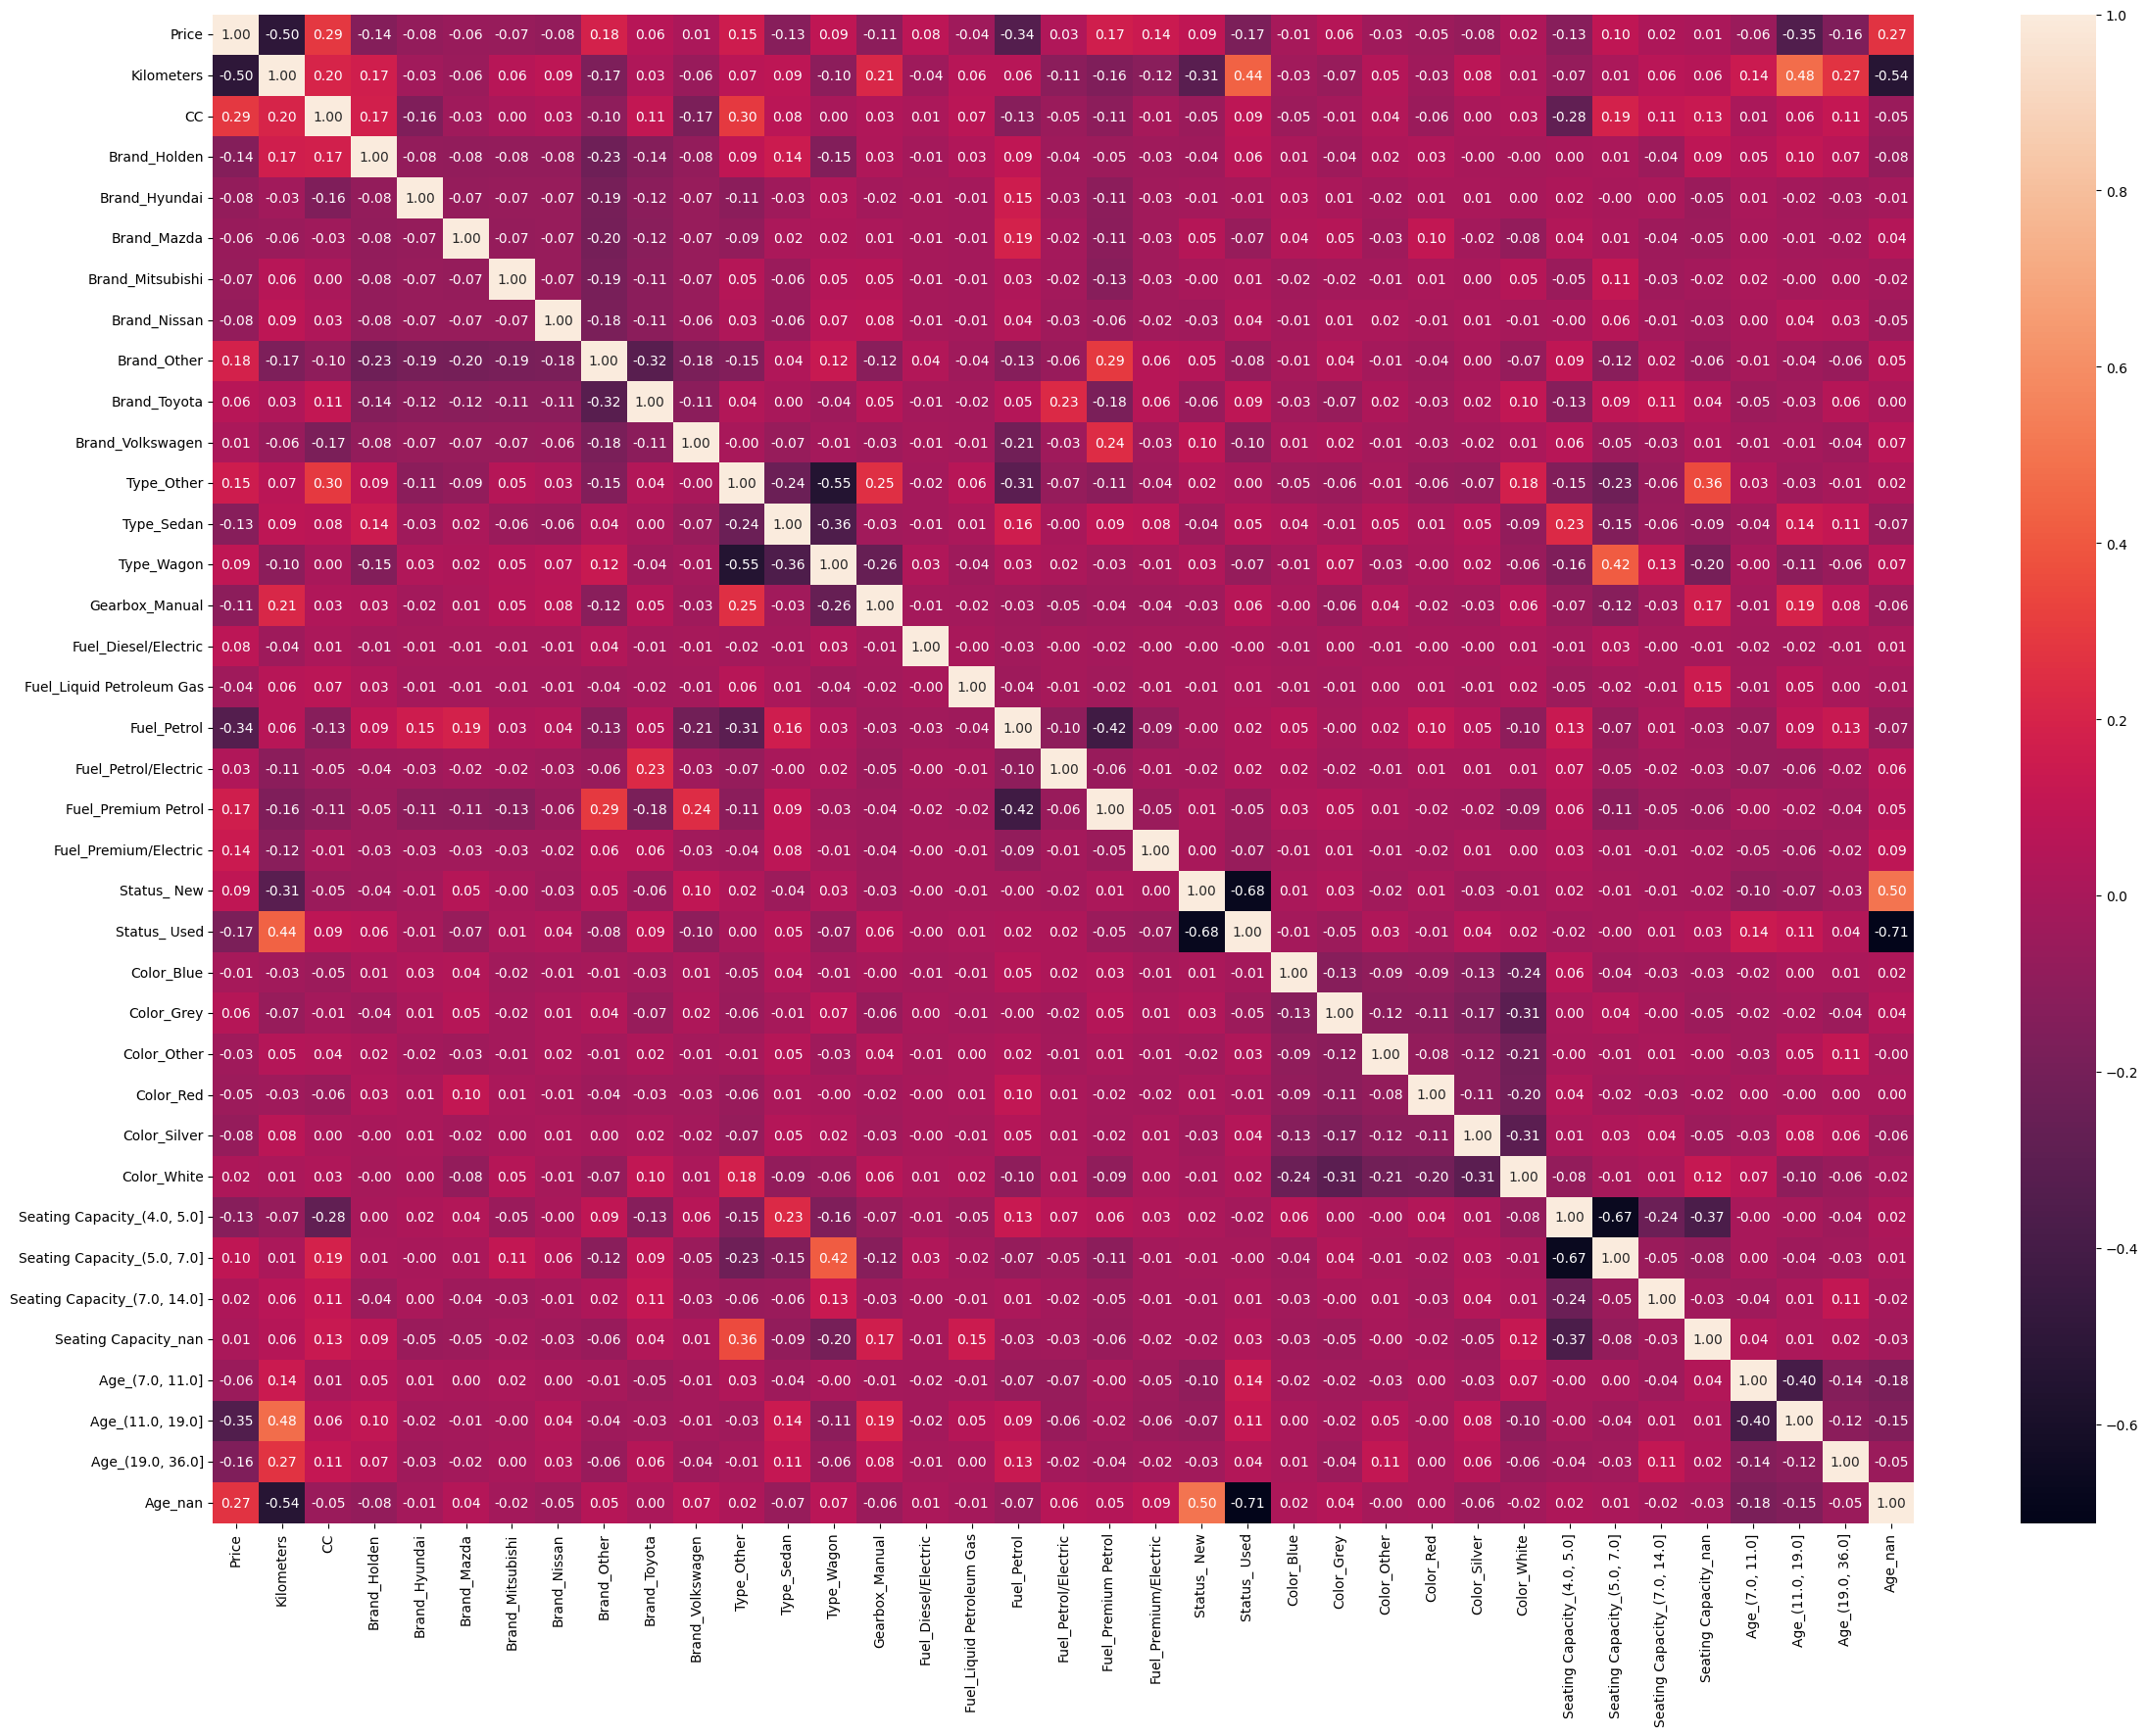

In [114]:
plt.figure(figsize=(28, 20))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

In [116]:
data["Age_nan"].value_counts()

Age_nan
0.0    15857
1.0     1102
Name: count, dtype: int64

In [117]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [119]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=23)

In [3]:
models = [Linear Regression(), AdaBoostRegressor(), RandomForestRegressor(), KNeighborsRegressor(n_neighbors=21)]

SyntaxError: unterminated string literal (detected at line 1) (490548146.py, line 1)

In [121]:
for i in models:
    print(f"Model : {i}")
    i.fit(X_tr, y_tr)
    print(f"Training Score : {i.score(X_tr, y_tr)}")
    pred = i.predict(X_te)
    print(f"MSE : {mean_squared_error(y_te, pred)}")
    print(f"R2 Score : {r2_score(y_te, pred)}")
    print("=="*50)

Model : LinearRegression()
Training Score : 0.534155694271653
MSE : 462236731.5689061
R2 Score : 0.5102662800340023
Model : AdaBoostRegressor()
Training Score : -0.11144745018961744
MSE : 1070078464.7495131
R2 Score : -0.13373401853755884
Model : RandomForestRegressor()
Training Score : 0.9701090357021638
MSE : 157123381.69416296
R2 Score : 0.8335298496302019
Model : KNeighborsRegressor(n_neighbors=21)
Training Score : 0.7448289873366256
MSE : 317314369.9625519
R2 Score : 0.6638096105582605


In [122]:
pca = PCA(n_components=10)
pri_comp = pca.fit_transform(X)

In [123]:
X_tr, X_te, y_tr, y_te = train_test_split(pri_comp, y, train_size=0.75, random_state=23)

In [124]:
for i in models:
    print(f"Model : {i}")
    i.fit(X_tr, y_tr)
    print(f"Training Score : {i.score(X_tr, y_tr)}")
    pred = i.predict(X_te)
    print(f"MSE : {mean_squared_error(y_te, pred)}")
    print(f"R2 Score : {r2_score(y_te, pred)}")
    print("=="*50)

Model : LinearRegression()
Training Score : 0.4915365562770849
MSE : 491942520.7051432
R2 Score : 0.4787933882782197
Model : AdaBoostRegressor()
Training Score : -0.5561360272658711
MSE : 1580158561.0507333
R2 Score : -0.674157152359784
Model : RandomForestRegressor()
Training Score : 0.9633332964796419
MSE : 236911802.34239385
R2 Score : 0.7489950704021584
Model : KNeighborsRegressor(n_neighbors=21)
Training Score : 0.7462977388308522
MSE : 302423369.97329885
R2 Score : 0.6795864286272144


In [134]:
params = {
    "n_estimators":[100, 150, 200],
    "criterion":['squared_error', "friedman_mse"],
    "max_depth":[None, 5, 8],
    "max_features":[1, 2]
}

In [135]:
gscv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, n_jobs=-1, cv=5, verbose=True)

In [136]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 8], 'max_features': [1, 2],
                         'n_estimators': [100, 150, 200]},
             verbose=True)

In [137]:
gscv.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_features=2,
                      n_estimators=200)

In [138]:
gscv.best_score_

0.7358141994706248

In [160]:
pca = PCA(n_components=15)
pri_comp = pca.fit_transform(X)

In [161]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=23)

In [162]:
rf_model = RandomForestRegressor(n_estimators=350, max_depth=6, criterion="friedman_mse")

In [163]:
rf_model.fit(X_tr, y_tr)
print(f"Training Score : {rf_model.score(X_tr, y_tr)}")
pred = rf_model.predict(X_te)
print(f"MSE : {mean_squared_error(y_te, pred)}")
print(f"R2 Score : {r2_score(y_te, pred)}")

Training Score : 0.7860966422516218
MSE : 230985268.1869477
R2 Score : 0.7552741551659349


In [164]:
X_tr, X_te, y_tr, y_te = train_test_split(pri_comp, y, train_size=0.75, random_state=23)

In [165]:
rf_model = RandomForestRegressor(n_estimators=350, max_depth=6, criterion="friedman_mse")
rf_model.fit(X_tr, y_tr)
print(f"Training Score : {rf_model.score(X_tr, y_tr)}")
pred = rf_model.predict(X_te)
print(f"MSE : {mean_squared_error(y_te, pred)}")
print(f"R2 Score : {r2_score(y_te, pred)}")

Training Score : 0.7736409486413076
MSE : 285826832.27168095
R2 Score : 0.6971702414055323
